# Aula 1 - Sistemas Lineares

## Lei de Kirchhoff
A soma algébrica da d.d.p (Diferença de Potencial Elétrico) em um percurso fechado é nula.

$\sum_{i=1}^{n} U_i =0$

Também, Em um nó, a soma das correntes elétricas que entram é igual à soma das correntes que saem, ou seja, um nó não acumula carga.

$\sum_{i=1}^{n} i_i =0$

---
A aplicação destas duas leis em circuito facilita a sua formulação em forma de um sistema linear de *n* equações quando *n* variáveis existem.

### Exemplo
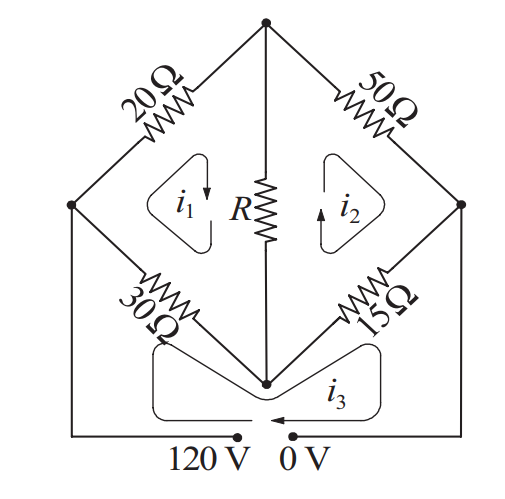

O circuito acima pode ser visto em três loops, aplicando a Lei de Kirchhoff temos:

$\begin{matrix}
(50+R)i_1 - R i_2 - 30 i_3 = 0  & \\ 
-R i_1 + (65 + R)i_2 -15 i_3 = 0 & \\ 
-30 i_2 - 15 i_2 + 45 i_3 = 120 &
\end{matrix}$

Se considerarmos as resistências iguais a $R_i = 20 \Omega$, respectivamente, qual o valor das correntes?

### Resolução
Este problema pode ser visto no seguinte formato matricial:

$\begin{matrix}
(50+20)i_1 - 20 i_2 - 30 i_3 = 0 \\ 
-20 i_1 + (65 + 20)i_2 -15 i_3 = 0 \\ 
-45 i_2 + 45 i_3 = 120
\end{matrix}$

Convertendo para o formato $A\times x = b$ temos:

$\begin{bmatrix}
70 & - 20 & - 30 \\ 
-20 & + 85 & - 15 \\ 
0 & - 45 & + 45
\end{bmatrix}
\begin{Bmatrix}
i_1\\ 
i_2\\ 
i_3
\end{Bmatrix}
=
\begin{Bmatrix}
0\\ 
0\\ 
120
\end{Bmatrix}$

#### Definição das matrizes que compõem o sistema linear!

In [1]:
import sys
import numpy as np
from fractions import Fraction

def imprimeResultados(x):
    for i in range(len(x)):
        print("I{} = {:.3g} A".format(i+1, float(x[i])))

a = np.array([[70, -20, -30],
              [-20, 85, -15],
              [0, -45, 45]])
b = np.array([0, 0, 120]).reshape(3,1)

print("Matrix de Variáveis A:\n{}".format(a))
print("Vetor de Resultados B:\n{}".format(b))

Matrix de Variáveis A:
[[ 70 -20 -30]
 [-20  85 -15]
 [  0 -45  45]]
Vetor de Resultados B:
[[  0]
 [  0]
 [120]]


### Método 1 - Matrix inversa (Gauss Jordan)

In [2]:
def gaussJordan(M):
    n = len(M)
    for k in range(n):
        M[k] = M[k]/M[k,k]
        for i in range(n):
            if i!=k:
                M[i] = M[i] - M[i,k]*M[k]
    return (M)

# Preparação da matriz para a função gaussJordan
## Note que a função utiliza a forma ampliada da matriz A com a identidade. Isto forma a matriz M = (A|B)
i = np.identity(len(a))
M = np.concatenate((a,i), axis=1)
print(M)

[[ 70. -20. -30.   1.   0.   0.]
 [-20.  85. -15.   0.   1.   0.]
 [  0. -45.  45.   0.   0.   1.]]


In [3]:
# Chamada da função gaussJordan
M = gaussJordan(M)
print(M)

[[1.         0.         0.         0.01794872 0.01282051 0.01623932]
 [0.         1.         0.         0.00512821 0.01794872 0.00940171]
 [0.         0.         1.         0.00512821 0.01794872 0.03162393]]


In [4]:
# Note que a matriz inversa está na segunda parte da matriz ampliada, desta forma podemos selecioná-la
aInv = M[:,3:6]
# O cálculo do sistema procede com:
## x = b * aInv
x = aInv @ b # @ é o operador de produto escalar em python3
# Impressão dos resultados do sistema linear
imprimeResultados(x)

I1 = 1.95 A
I2 = 1.13 A
I3 = 3.79 A


### Método 2 - Matriz inversa utilizando a biblioteca Numpy

In [5]:
# Matriz Inversa de A
aInv = np.linalg.inv(a)
# Produto da matriz inversa Ainv com o Vetor de Soluções b
x = np.dot(aInv, b)
# Impressão dos resultados do sistema linear
imprimeResultados(x)

I1 = 1.95 A
I2 = 1.13 A
I3 = 3.79 A


### Método 3 - Solver da biblioteca Numpy

In [6]:
# Cálculo utilizando a função linalg.solve() do módulo numpy
x = np.linalg.solve(a,b)
# Impressão dos resultados do sistema linear
imprimeResultados(x)

I1 = 1.95 A
I2 = 1.13 A
I3 = 3.79 A
